# Testing the best Algorithms for Predicting Glass Transition Temperatures

1. K-NN
2. Random Forest Regression

### Importing and Analysing the Given Dataset

In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd  
import math  
import sklearn.metrics  
from sklearn.model_selection import train_test_split  

Reading data from file and splitting the dataset into training and test datasets.

In [ ]:
data_set= pd.read_csv('1-s2.0-S1359645420300720-mmc1.csv')  

print(data_set.head(1));

x= data_set.iloc[:, 1:66].values  
y= data_set.iloc[:, 66].values  
 


             ID   Li   Be         B         O   Na        Mg        Al  \
0  478474_40951  0.0  0.0  0.099699  0.628564  0.0  0.008412  0.052889   

         Si    P  ...   Hf   Ta    W   Hg   Tl   Pb   Bi   Th    U      Tg  
0  0.180302  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  341.65  

[1 rows x 67 columns]


In [ ]:
# data_set.hist(column=['Tg'],bins=100, figsize=(10,10))
# plt.title('Histogram of Tg and Number of Samples')
# plt.xlabel('Tg')
# plt.ylabel('Number of Samples')


# x = nm.mean(data_set['Tg'])
# print("Mean" , x)
# x = nm.median(data_set['Tg'])
# print("Median" , x)


In [ ]:
# data_set.hist(column=['O'],bins=100, figsize=(10,10))
# plt.title('Histogram of Atomic Percentage of Oxygen')
# plt.xlabel('O')
# plt.ylabel('Number of Samples')



In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
print(x_train[1]);
print(y_train[1]);

print(len(data_set));

[0.0056243  0.         0.0056243  0.62429699 0.00843645 0.
 0.00618673 0.         0.1631046  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02671541 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.1574803  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00253093 0.
 0.         0.         0.         0.         0.        ]
561.15
51000


### K Neighbours Regression

The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. We are going to use KNN with K = sqrt(N) for best results i.e. K neighbours of a node are considered while training the data.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
regressor_knn= KNeighborsRegressor(n_neighbors=6, weights = "distance")  
regressor_knn.fit(x_train, y_train)  


KNeighborsRegressor(n_neighbors=6, weights='distance')

Predicting the data using the test dataset

In [ ]:
y_pred= regressor_knn.predict(x_test)  

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)  
  
rmse = math.sqrt(mse)  
  
print("The difference between actual and predicted values", rmse)

The difference between actual and predicted values 34.33536045704681


Calculating the various parameters as mentioned in the paper for evaluating the algorithm used.

1. **RMSE(Root Mean Square Error):** Compares the squared deviations from the expected outcomes and takes the square root from the
aggregated errors.
2. **RRMSE (Relative Root Mean Square Error):** Assesses the predictive performance regression algorithms, bringing the advantage of measuring the
target algorithm improvements over a baseline.
3. **RD (Relative Deviation):** Measures how the predictions deviate from the expected outcome in percentage.
4. **R^2 (Proportion of Variance):** Proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RMSE ", rmse);

mean_y_test = y_test.mean()
# print(mean_y_test)
denom = nm.sum(nm.square(y_pred-mean_y_test))
# print(denom)
numer = nm.sum(nm.square(y_pred-y_test))
# print(numer)

rrmse = math.sqrt(numer/denom);
print("RRMSE ", rrmse)

rd = sum(abs(y_test-y_pred)/y_test)*100/len(y_test);

print("RD " , rd)

r_square = 1 - (rrmse*rrmse);
print("R_SQUARE ", r_square);

RMSE  34.33536045704681
RRMSE  0.22928145316348406
RD  2.6084995310671055
R_SQUARE  0.9474300152352411


### Random Forest Regression

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor_rf = RandomForestRegressor(n_estimators = 100, max_features = "sqrt")
  
# fit the regressor with x and y data
regressor_rf.fit(x_train, y_train) 

RandomForestRegressor(max_features='sqrt')

Predicting the data using the test dataset

In [ ]:
y_pred = regressor_rf.predict(x_test)

Calculating the various parameters as mentioned in the paper for evaluating the algorithm used.

1. **RMSE(Root Mean Square Error):** Compares the squared deviations from the expected outcomes and takes the square root from the
aggregated errors.
2. **RRMSE (Relative Root Mean Square Error):** Assesses the predictive performance regression algorithms, bringing the advantage of measuring the
target algorithm improvements over a baseline.
3. **RD (Relative Deviation):** Measures how the predictions deviate from the expected outcome in percentage.
4. **R^2 (Proportion of Variance):** Proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RMSE ", rmse);

mean_y_test = y_test.mean()
# print(mean_y_test)
denom = nm.sum(nm.square(y_pred-mean_y_test))
# print(denom)
numer = nm.sum(nm.square(y_pred-y_test))
# print(numer)

rrmse = math.sqrt(numer/denom);
print("RRMSE ", rrmse)

rd = sum(abs(y_test-y_pred)/y_test)*100/len(y_test);

print("RD " , rd)

r_square = 1 - (rrmse*rrmse);
print("R_SQUARE ", r_square);

RMSE  31.24044477446083
RRMSE  0.2155501748684451
RD  2.4903036893779777
R_SQUARE  0.9535381221141828


Finding the values of other parameters to have an insight of the algorithm and how it can be used to train the model better.

In [ ]:
mean_y_test = y_test.mean()
print(mean_y_test)
denom = nm.sum(nm.square(y_pred-mean_y_test))
print(denom)
numer = nm.sum(nm.square(y_pred-y_test))
print(numer)
print(math.sqrt(numer/denom))

767.6092156862744
267822982.73294094
12443558.718753247
0.2155501748684451


In [ ]:
sum(abs(y_test-y_pred)/y_test)*100/len(y_test)

2.4903036893779777

### Relative Importance of Parameters

The Relative variable importance graph plots the predictors in order of their effect on model improvement when splits are made on a predictor over the entire forest. The variable with the highest improvement score is set as the most important variable, and the other variables follow in order of importance. Relative variable importance standardizes the importance values for ease of interpretation. Relative importance is defined as the percent improvement with respect to the most important predictor, which has an importance of 100%.

Relative importance is calculated by dividing each variable importance score by the largest importance score of the variables, then we multiply by 100%.



In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(max_depth=25,random_state=None)
tree_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=25)

In [ ]:
data = '1-s2.0-S1359645420300720-mmc1.csv'

df = pd.read_csv(data)
del df['ID']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Li      51000 non-null  float64
 1   Be      51000 non-null  float64
 2   B       51000 non-null  float64
 3   O       51000 non-null  float64
 4   Na      51000 non-null  float64
 5   Mg      51000 non-null  float64
 6   Al      51000 non-null  float64
 7   Si      51000 non-null  float64
 8   P       51000 non-null  float64
 9   K       51000 non-null  float64
 10  Ca      51000 non-null  float64
 11  Sc      51000 non-null  float64
 12  Ti      51000 non-null  float64
 13  V       51000 non-null  float64
 14  Cr      51000 non-null  float64
 15  Mn      51000 non-null  float64
 16  Fe      51000 non-null  float64
 17  Co      51000 non-null  float64
 18  Ni      51000 non-null  float64
 19  Cu      51000 non-null  float64
 20  Zn      51000 non-null  float64
 21  Ga      51000 non-null  float64
 22

Relative importance of the features:  [0.00000000e+00 0.00000000e+00 5.29542656e-03 1.50117859e-01
 9.02018983e-03 2.17181228e-03 2.78600208e-02 7.39104305e-01
 3.36775187e-05 1.06297180e-03 5.37693663e-03 0.00000000e+00
 2.15804881e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.36305263e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.40138099e-03
 3.15073684e-05 8.36476398e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.56180315e-03 1.79670826e-03 1.19277895e-04
 0.00000000e+00 0.00000000e+00 9.14356690e-05 9.04229322e-04
 1.06943844e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.56522055e-03 0.00000000e+00 4.28645593e-03 2.64479874e-03
 3.09033047e-03 8.15012029e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0

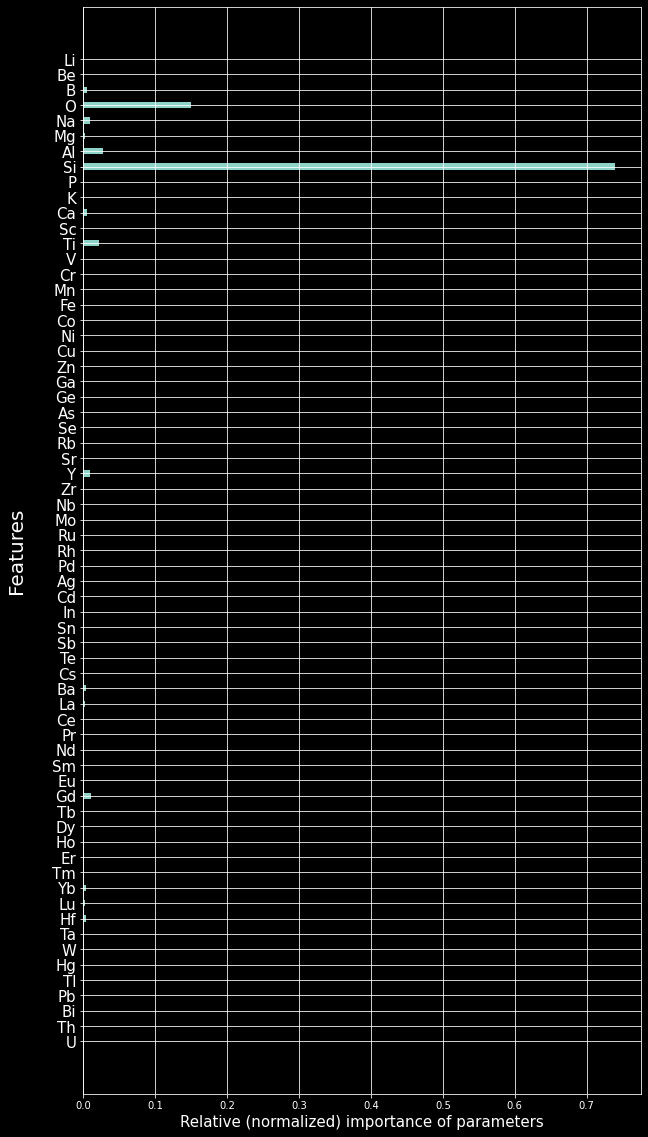

In [ ]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with mtp.style.context('dark_background'):
    mtp.figure(figsize=(10,20))
    mtp.grid(True)
    mtp.yticks(range(len(df.columns),1,-1),df.columns[:-1],fontsize=15)
    mtp.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    mtp.ylabel("Features\n",fontsize=20)
    mtp.barh(range(len(df.columns),1,-1),width=tree_model.feature_importances_,height=0.40)

### Dataset Partitioning

Partitioning the dataset based on high ( >= 1150 ) and low ( <=450 ) to find the same parameters on low and high values of Tg.

In [ ]:
low_extreme_values = data_set[ (data_set['Tg'] <= 450)];
high_extreme_values = data_set[data_set['Tg'] >= 1150];

#printing number of data values in the low and high Tg categories
print(len(low_extreme_values));
print(len(high_extreme_values));

496
378


Splitting the given dataset based on the high Tg values into test and train datasets.

In [ ]:
x = high_extreme_values.iloc[:, 1:66].values  
y = high_extreme_values.iloc[:, 66].values  
  
# print(x[0]);
# print(y[0]);

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
print(x_train[0]);
print(y_train[0]);


[0.         0.         0.         0.62366829 0.00361034 0.0088829
 0.1013895  0.1809935  0.00094582 0.01472809 0.02234547 0.
 0.0033615  0.         0.         0.         0.04007458 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
1183.15


**Training and printing the outputs using the K-Neighbours Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 
regressor_knn= KNeighborsRegressor(n_neighbors=6, weights = "distance")  
regressor_knn.fit(x_train, y_train)  

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [ ]:
y_pred= regressor_knn.predict(x_test)  

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RMSE ", rmse);

mean_y_test = y_test.mean()
# print(mean_y_test)
denom = nm.sum(nm.square(y_pred-mean_y_test))
# print(denom)
numer = nm.sum(nm.square(y_pred-y_test))
# print(numer)

rrmse = math.sqrt(numer/denom);
print("RRMSE ", rrmse)

rd = sum(abs(y_test-y_pred)/y_test)*100/len(y_test);

print("RD " , rd)

r_square = 1 - (rrmse*rrmse);
print("R_SQUARE ", r_square);

RMSE  29.9548228924698
RRMSE  0.46071378701201093
RD  1.463676195428497
R_SQUARE  0.7877428064570514


**Training and printing the outputs using the K-Neighbours Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor_rf = RandomForestRegressor(n_estimators = 70, max_features = "sqrt")
  
# fit the regressor with x and y data
regressor_rf.fit(x_train, y_train) 

RandomForestRegressor(max_features='sqrt', n_estimators=70)

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print("RMSE ", rmse);

mean_y_test = y_test.mean()
# print(mean_y_test)
denom = nm.sum(nm.square(y_pred-mean_y_test))
# print(denom)
numer = nm.sum(nm.square(y_pred-y_test))
# print(numer)

rrmse = math.sqrt(numer/denom);
print("RRMSE ", rrmse)

rd = sum(abs(y_test-y_pred)/y_test)*100/len(y_test);

print("RD " , rd)

r_square = 1 - (rrmse*rrmse);
print("R_SQUARE ", r_square);

RMSE  35.31659605744561
RRMSE  0.509151163123079
RD  1.6189432105650599
R_SQUARE  0.7407650930904158
